# ** Template Match **

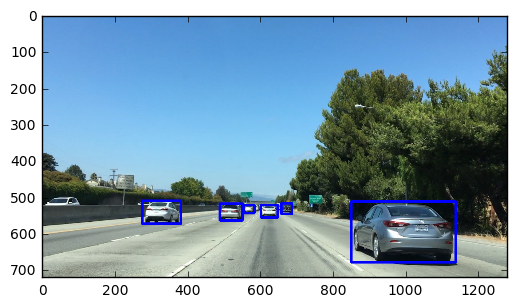

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('./images/bbox-example-image.jpg')
templist = ['./images/cutout1.jpg', './images/cutout2.jpg', './images/cutout3.jpg',
            './images/cutout4.jpg', './images/cutout5.jpg', './images/cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Make a copy of the image to draw on
    img_copy = img.copy()
    
    # Define an empty list to take bbox coords
    bbox_list = []
    for fname in template_list:
        template = mpimg.imread(fname)
        h, w = template.shape[:-1]
        
        res = cv2.matchTemplate(img, template, eval('cv2.TM_SQDIFF'))
        min_val, mix_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        top_left = min_loc
        bottom_right = (min_loc[0] + w, min_loc[1] + h)
        bbox_list.append([top_left, bottom_right])
        
    return bbox_list

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()


# ** Histogrm of Color **

In [120]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('./images/cutout1.jpg')

# Define a function to compute color histogram features
def color_hist(img, nbins=32, bin_range=(0, 256)):
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bin_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bin_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bin_range)
    """
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges) - 1])/2

    fig = plt.figure(figsize=(12, 3))
    plt.subplot(131)
    plt.bar(bin_centers, rhist[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bin_centers, ghist[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bin_centers, bhist[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    plt.show()
    """
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    return hist_features
    
color_hist(img)


array([400, 441, 302, 244, 189, 283, 412, 433, 239, 177, 209, 302, 276,
       179, 129, 106, 104, 111, 106,  96, 111, 123, 139, 130, 167, 164,
       149, 156, 222, 268, 258,  53,  95, 219, 441, 331, 235, 179, 188,
       324, 340, 321, 252, 215, 242, 296, 244, 198, 133, 117,  98, 127,
        88, 120, 104,  88, 117, 172, 152, 142, 133, 159, 219, 589, 106,
       206, 367, 337, 230, 174, 235, 328, 316, 238, 189, 227, 261, 271,
       291, 244, 179, 148, 134, 112, 129, 123,  94,  93, 160, 138, 117,
       110, 121, 148, 219, 633])

# ** Color Space **

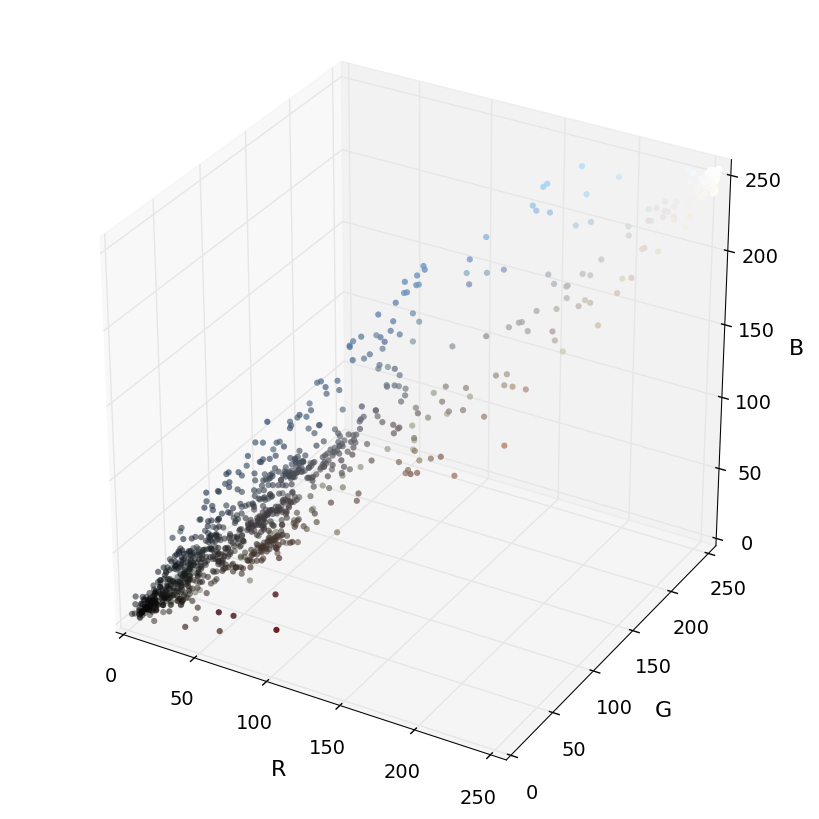

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, color_rgb, axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """ Plot pixels in 3D """

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)
    
    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])
    
    # Set axes labels an
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)
    
    # Plot pixel values with color given in color_rgb
    ax.scatter(
        pixels[:,:,0].ravel(),
        pixels[:,:,1].ravel(),
        pixels[:,:,2].ravel(),
        c=color_rgb.reshape((-1, 3)), edgecolor='none')
    
    return ax

# Read image
img = cv2.imread('./images/KITTISampleImage.png')

# Select small farction of image
w, h = img.shape[1], img.shape[0]
scale = max(w, h, 64)/64
img_small = cv2.resize(img, (np.int(w/scale), np.int(h/scale)), interpolation=cv2.INTER_NEAREST)

img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB/255.

plot3d(img_small_RGB, img_small_rgb)
plt.show()

# ** Spatial Binning of Color **

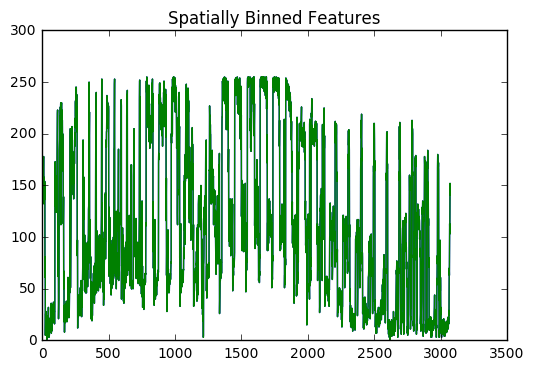

In [82]:
# Define a function to compute binned color features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

# Read in an image
# You can also read cutout2, 3, 4 etc. to see other examples
image = mpimg.imread('./images/cutout1.jpg')

feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()

# ** HOG Features **

Paper link: http://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf

Video link: https://www.youtube.com/watch?v=7S5qXET179I

Brief Description: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py

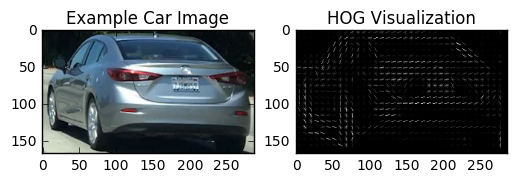

In [103]:
from skimage.feature import hog

def get_hog_features(img, orientations, pixels_per_cell, cells_per_block, visualize=False, feature_vector=True):
    if visualize == True:
        features, img_hog = hog(img, orientations=orientations, pixels_per_cell=(pixels_per_cell, pixels_per_cell), 
                                cells_per_block=(cells_per_block, cells_per_block), visualise=True, feature_vector=feature_vector)
        return features, img_hog
    else:
        features = hog(img, orientations=orientations, pixels_per_cell=(pixels_per_cell, pixels_per_cell)
                       , cells_per_block=(cells_per_block, cells_per_block), visualise=False, feature_vector=feature_vector)
        return features

img = mpimg.imread('./images/cutout6.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

orientations = 9
pixels_per_cell = 8
cells_per_block = 2

features, img_hog = get_hog_features(gray, orientations, pixels_per_cell, cells_per_block, 
                                     visualize=True, feature_vector=True)

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(img_hog, cmap='gray')
plt.title('HOG Visualization')
plt.show()

In [89]:
import glob

def data_look(car_list, non_car_list):
    data_dict = {}
    data_dist['n_cars'] = len(car_list)
    data_dist['n_non_cars'] = len(non_car_list)

    img_example = cv2.imread(car_list[0])
    data_dict['image_shape'] = (img_example.shape)
    data_dict['data_type'] = (img_example.dtype)
    
    return data_dict

images = glob.glob('./small_image_data_set/vehicles_smallset/cars1/*.jpeg')
print(len(images))
    

397


In [161]:
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32), hist_nbins=32, hist_bin_range=(0, 256),
                    orientations=9, pixels_per_cell=8, cells_per_block=2, hog_channel=0,
                    spatial_feature=True, hist_feature=True, hog_feature=True):
    features = []

    for file in imgs:
        img = mpimg.imread(file)
        features.append(extract_features_single_image(img, color_space, spatial_size, hist_nbins, hist_bin_range, 
                                              orientations, pixels_per_cell, cells_per_block, hog_channel,
                                              spatial_feature, hist_feature, hog_feature))
    
    return features

def extract_features_single_image(img, color_space='RGB', spatial_size=(32, 32), hist_nbins=32, hist_bin_range=(0, 256),
                    orientations=9, pixels_per_cell=8, cells_per_block=2, hog_channel=0,
                    spatial_feature=True, hist_feature=True, hog_feature=True):
    file_features = []

    if color_space != 'RGB':
        if cspace == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    else:
        feature_image = np.copy(img)

    if spatial_feature == True:
        spatial_features = bin_spatial(img, color_space, spatial_size)
        file_features.append(spatial_features)

    if hist_feature == True:
        hist_features = color_hist(img, hist_nbins, hist_bin_range)
        file_features.append(hist_features)

    if hog_feature == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(img.shape[2]):
                hog_features.append(get_hog_features(img[:,:,channel], orientations, pixels_per_cell, 
                                                     cells_per_block, visualize=False, feature_vector=True))
            hog_features = np.ravel(hog_features)
        else:
            hog_features = get_hog_features(img[:,:,hog_channel], orientations, pixels_per_cell, 
                                                     cells_per_block, visualize=False, feature_vector=True)

        file_features.append(hog_features)
            
    return np.concatenate(file_features)

# ** Color Classify **

In [159]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

# Read car images
cars = glob.glob('./small_image_data_set/vehicles_smallset/cars1/*.jpeg')
#cars.append(glob.glob('./small_image_data_set/vehicles_smallset/cars2/*.jpeg'))
#cars.append(glob.glob('./small_image_data_set/vehicles_smallset/cars3/*.jpeg'))
print('Number of car images: ',len(cars))

# Read non car images
noncars = glob.glob('./small_image_data_set/non-vehicles_smallset/notcars1/*.jpeg')
#noncars.append(glob.glob('./small_image_data_set/non-vehicles_smallset/notcars2/*.jpeg'))
#noncars.append(glob.glob('./small_image_data_set/non-vehicles_smallset/notcars3/*.jpeg'))
print('Number of noncar images: ',len(noncars))

# Extract features
spatial_size = 32
histbin = 32
bin_range = (0, 256)
car_features = extract_features(cars, color_space='RGB', spatial_size=(spatial_size, spatial_size), \
                               hist_nbins=histbin, hist_bin_range=bin_range)
noncar_features = extract_features(noncars, color_space='RGB', spatial_size=(spatial_size, spatial_size), \
                               hist_nbins=histbin, hist_bin_range=bin_range)

# Create an array stack of feature vectors
X = np.vstack((car_features, noncar_features)).astype(np.float64)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(noncar_features))))

# Split up data into train and test set
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using spatial binning of', spatial_size, 'and', histbin, 'histogram bins')
print('Feature vector length:', len(X_train[0]))

# Define linear SVC
svc = LinearSVC()
t1 = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t1, 2),'seconds to train SVC...')

# Check the SVC score
print('Test Accuracy of SVC =', round(svc.score(X_test, y_test), 4))

# Prediction
t1 = time.time()
n_predict = 10
print('My SVC predicts:    ', svc.predict(X_test[0:n_predict]))
print('For these', n_predict, 'labels:', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t1, 5),'seconds to predict', n_predict, 'labels with SVC')

Number of car images:  397
Number of noncar images:  399
Using spatial binning of 32 and 32 histogram bins
Feature vector length: 4932
0.19 seconds to train SVC...
Test Accuracy of SVC = 0.9812
My SVC predicts:     [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
For these 10 labels: [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
0.00097 seconds to predict 10 labels with SVC


# ** Sliding Window **

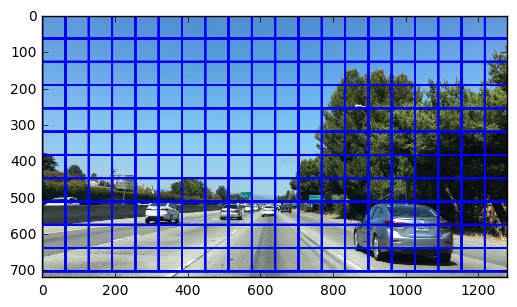

In [152]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imgcopy = np.copy(img)
    
    for box in bboxes:
        cv2.rectangle(imgcopy, box[0], box[1], color, thick)
    
    return imgcopy

def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # Use image dimension if start/stop positions not defined
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]

    # Compute the span of the region to be searched
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1-xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1-xy_overlap[1]))
    nx_buffer = np.int(xy_window[0]*xy_overlap[0])
    ny_buffer = np.int(xy_window[1]*xy_overlap[1])
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step)
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)

    # Initialize a list
    window_list = []
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            start_x = x_start_stop[0] + (xs*nx_pix_per_step)
            end_x = start_x + xy_window[0]
            start_y = y_start_stop[0] + (ys*ny_pix_per_step)
            end_y = start_y + xy_window[1]
            
            window_list.append(((start_x, start_y), (end_x, end_y)))
            
    return window_list

img = mpimg.imread('./images/bbox-example-image.jpg')
windows = slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], xy_window=(128, 128), xy_overlap=(0.5, 0.5))
window_img = draw_boxes(img, windows, color=(0, 0, 255), thick=6)
plt.imshow(window_img)
plt.show()


# ** Search Windows **

In [163]:
def search_windows(img, windows, clf, scaler, color_space='RGB',
                  spatial_size=(32, 32), hist_bins=32,
                  hist_range=(0, 256), orientations=9,
                  pixels_per_cell=8, cells_per_block=2,
                  hog_channel=0, spatial_feature=True,
                  hist_feature=True, hog_feature=True):
    # 1. Create an empty list to receive positice detection windows
    on_windows = []
    # 2. Iterate over all windows in list
    for windos in windows:
        # 3. Extract test window from original image
        test_img = cv2.resize(img[window[0][1]:windos[1][1], window[0][0]:window[1][0]], (64, 64))
        # 4. Extract features for that window 
        features = extract_features_single_image(test_img, color_space=color_space, spatial_size=spatial_size,
                                                 hist_bins=hist_bins, hist_range=hist_range, orientations=orientations,
                                                 pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block,
                                                 hog_channel=hog_channel, spatial_feature=spatial_feature,
                                                 hist_feature=hist_feature, hog_feature=hog_feature)

        # 5. Scale extracted feature to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        # 6. Predict using classifer
        prediction = clf.predict(test_features)
        # 7. If prediction is positive, save the window
        if prediction == 1:
            on_windows.append(window)
            
    # 8. Return positive windows
    return on_windows

# ** Heat Map **

In [ ]:
def add_heat(heatmap, box_list):
    for box in box_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
        
    return heatmap

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    return heatmap